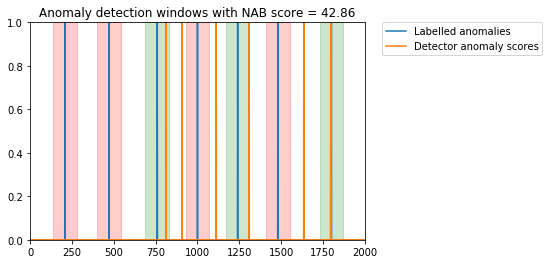

42.857138487111044

In [5]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt

def sigmoid(y, Atp= 1, Afp= -1): # 
    """
    Sigmoid score function gives a weight to detection based on their location in the anomaly window
    
    Parameters
    ----------
    y : relative position of detection within anomaly window
    Atp : weight of true positive
    Afp : weight of false positive
    """
    return((Atp-Afp)*(1/(1+np.exp(5*y)))-1)

def main(labels, anomaly_score, Afn = -1):
    """
    Generate single metric based on the ability of a detector to extract anomalies from the input data
    
    Variables
    ---------
    labels : hand labelled or simulated anomaly input locations
    anomaly_score : output of detectors binary scale (1 being 100% likely anomaly)
    Afn : weight of false negative
    
    Output
    ---------
    Snorm : normalized representation of the accuracy of a detector
    """
    # calculate number of anomalies and window sizes
    N_anomalies = np.sum(labels)
    windowSize = (len(anomaly_score)*0.1)/N_anomalies # 10% of data is window size
    windowSize2 = np.int(np.round(windowSize/2))

    # initialise various variables
    weights = np.zeros(N_anomalies)
    count = 0 
    fd = 0 # false detections
    raw_score = 0

    # plot output
    fig, ax = plt.subplots()
    ax.plot(labels[8000:],label = "Labelled anomalies")
    ax.plot(anomaly_score[8000:],label = "Detector anomaly scores")
    
    # find indicies of anomaly labels
    for idx_label, label in np.ndenumerate(labels):                  # loop through labels
        if label == 1: # labelled anomalies i.e. window centre points)

            # Include multiple labels into single window
            for window_idx in np.arange(windowSize2)+1:              # search within this window for other labels
                if labels[idx_label[0]+window_idx] == 1:             # if find other labelled anomalies within window
                    y_zero = idx_label[0] + window_idx + windowSize2 # end point of window extended to include label
                else:
                    y_zero = idx_label[0] + windowSize2              # end point of window is normal

            # Define window
            window = np.arange(idx_label[0]-windowSize2, y_zero,1) 

            # Calculate false negatives and detection weights
            if np.sum(anomaly_score[window]) == 0: # if window is empty
                ax.axvspan(window[0]-8000, window[-1]-8000, alpha=0.2, color='red')
                fd += 1 # create false negative
            else:                                  # if window not empty
                ax.axvspan(window[0]-8000, window[-1]-8000, alpha=0.2, color='green')
                # find index of first detection within window
                for idx_val, val in np.ndenumerate(anomaly_score[window]):
                    if val == 1:
                        # calculate sigmoid weight based on relative position within window
                        y = idx_val[0] - window.size # position relative to end of window
                        weights[count] = sigmoid(y)
                        break

            count += 1 # for each anomaly

    raw_score = np.sum(weights) + Afn*fd

    # Normalization
    Sperfect = N_anomalies
    Snull = -N_anomalies
    Snorm = 100*((raw_score-Snull)/(Sperfect-Snull))

    plt.ylim([0,1])
    plt.xlim([0,2000])
    plt.title("Anomaly detection windows with NAB score = %s" % np.round(Snorm,2))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    return Snorm



# example
series = read_csv("/home/codepan1/RestRunnerCode/alpha_Twitter_volume_AAPL.csv")
labels = series["label"].values
anomaly_score = series["anomaly_score"].values
main(labels, anomaly_score)

In [ ]:
# # Visualise sigmoid function

# # Sigmoid score function
# def sigmoid(y, Atp= 1, Afp= -1):
#     return((Atp-Afp)*(1/(1+np.exp(0.5*y)))-1)


# x = np.arange(-141,100,1)
# y = sigmoid(x)

# fig, ax = plt.subplots()
# ax.plot(x,y)
# ax.axvspan(-141, 0, alpha=0.2, color='red')
# plt.ylabel("Scaled sigmoid value")
# plt.xlabel("Relative position")
# plt.show()